<a href="https://colab.research.google.com/github/harshithgowdakc/Credit-Card-Default-Prediction/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing all libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
# Importing all libraries
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/practice/twitter.csv', encoding='latin1')

In [7]:
# Extract the header
header = df.columns.tolist()

# Create a new row with the header
new_row = pd.DataFrame([header], columns=df.columns)

# Append the new row to the dataset
df = pd.concat([new_row, df], ignore_index=True)

df.columns = ["target","ids","date","flag","user","text"]

In [8]:
#nltk download
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  object
 1   ids     1600000 non-null  object
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: object(6)
memory usage: 73.2+ MB


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.tail()

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [9]:
text_df = df.drop(['target','ids', 'date', 'flag', 'user'
       ], axis=1)
text_df.head()

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [8]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D 

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  



In [10]:
def data_processing(text):
  
    # Convert all text to lowercase
    text = text.lower()

    # Removing any URLs
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)

    # Remove user mentions and hashtags from tweet
    text = re.sub(r'\@w+|\#','',text)

    #  Remove all non-alphanumeric characters 
    text = re.sub(r'[^\w\s]','',text)

    #  Removing stopwords
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
text_df.text = text_df['text'].apply(data_processing)

In [12]:
# Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [14]:
text_df.head()

,text
0,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,upset cant update facebook texting might cry r...
2,kenichan dived many times ball managed save 50...
3,whole body feels itchy like fire
4,nationwideclass behaving im mad cant see


In [15]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [17]:
text_df.head()

,text,polarity
0,switchfoot httptwitpiccom2y1zl awww thats bumm...,0.200
1,upset cant update facebook texting might cry r...,0.000
2,kenichan dived many times ball managed save 50...,0.500
3,whole body feels itchy like fire,0.200
4,nationwideclass behaving im mad cant see,-0.625


In [18]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [19]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [20]:
text_df.head()

,text,polarity,sentiment
0,switchfoot httptwitpiccom2y1zl awww thats bumm...,0.200,Positive
1,upset cant update facebook texting might cry r...,0.000,Neutral
2,kenichan dived many times ball managed save 50...,0.500,Positive
3,whole body feels itchy like fire,0.200,Positive
4,nationwideclass behaving im mad cant see,-0.625,Negative


<Axes: xlabel='sentiment', ylabel='count'>

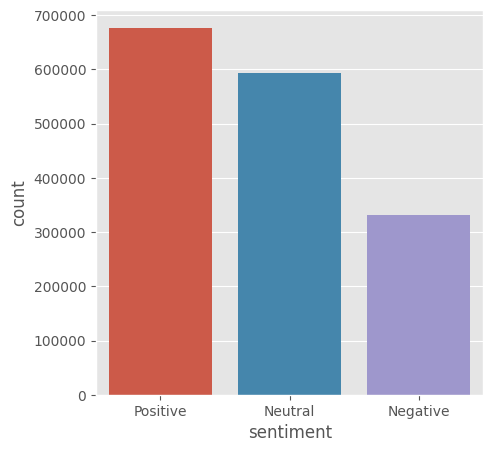

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

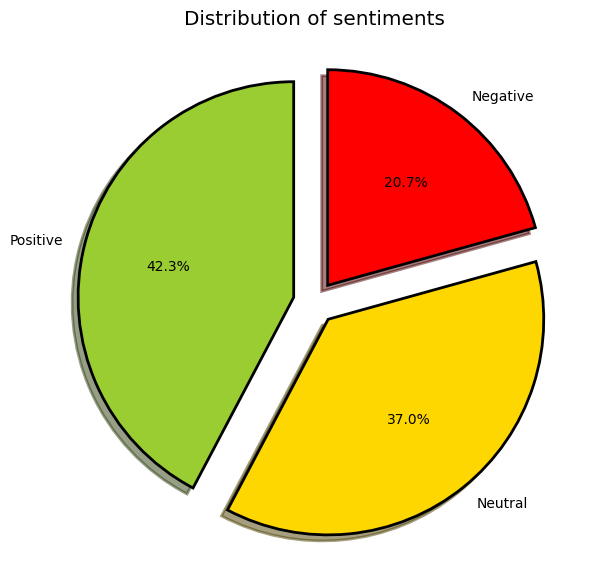

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
969965,sometimes home best thing ever still planned 2...,1.0,Positive
1162839,gitbc awesome give shout ive got plans sorted,1.0,Positive
1162600,hayleyolson ooooh theyre awesome,1.0,Positive
564135,conscience gastronomical desires arent best be...,1.0,Positive
1396384,frankjm awesome im gon na check,1.0,Positive


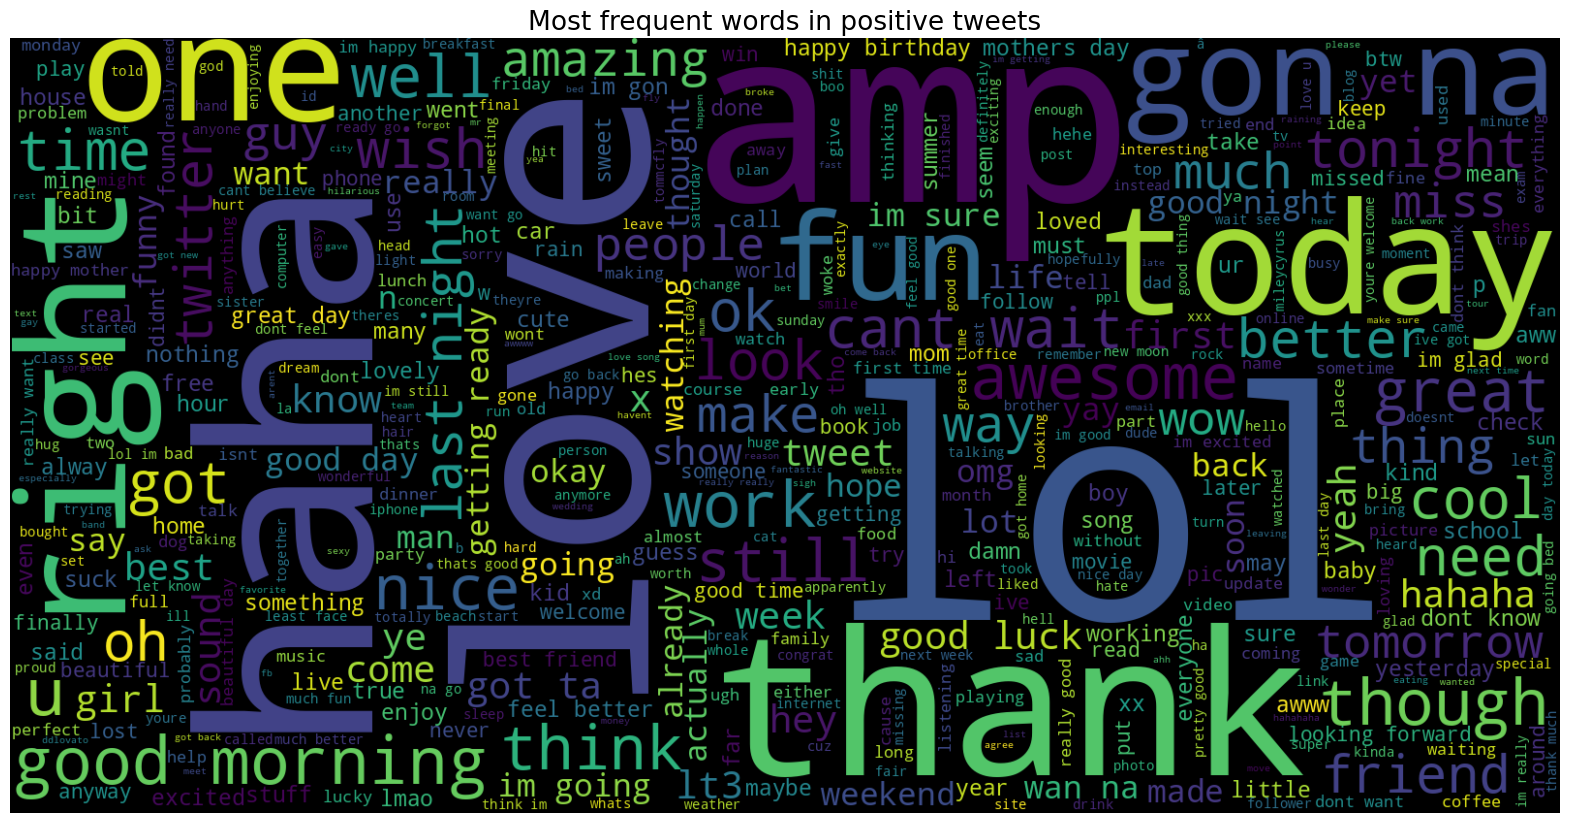

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
53866,oh shit remember boss fight first playthrough ...,-4.625929e-18,Negative
107822,im worn sweaty alas naked fun involved pity ca...,-5.551115e-18,Negative
154060,whats worse able big mac empty big mac box,-5.551115e-18,Negative
1143685,text im bored saw drag hell laughed ass 8 well...,-6.938894e-18,Negative
718851,dunno nights gon na early trip nova tomorrow m...,-6.938894e-18,Negative


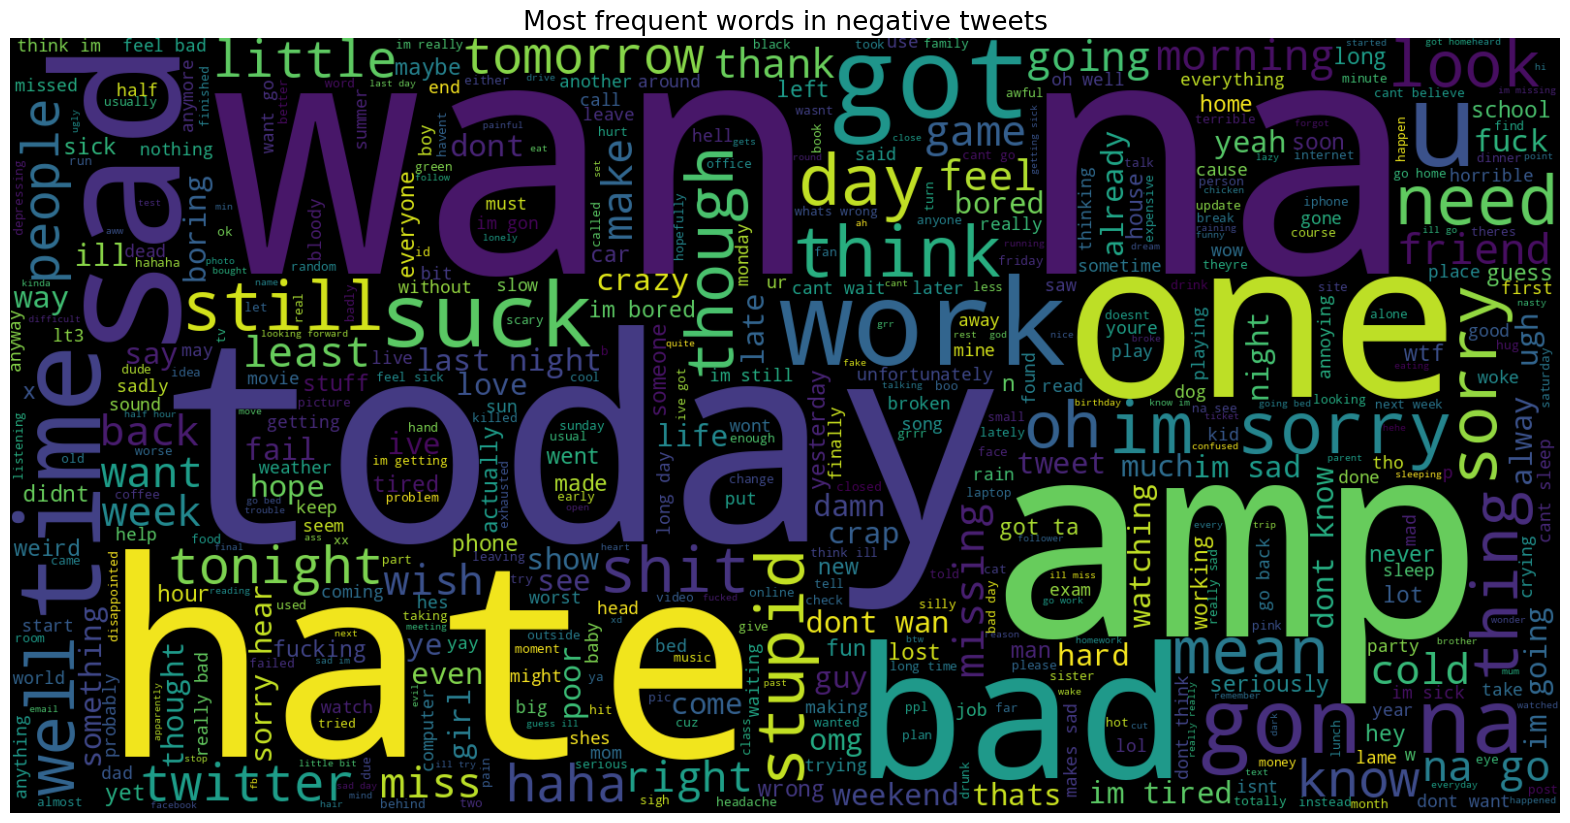

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
1,upset cant update facebook texting might cry r...,0.0,Neutral
1049538,follow finest bmore dom charmscity,0.0,Neutral
1049437,working weekend dtb week,0.0,Neutral
1049438,jonathanrknight u made clicking heels wishing,0.0,Neutral
1049439,imafat13yroldg yay see yah,0.0,Neutral


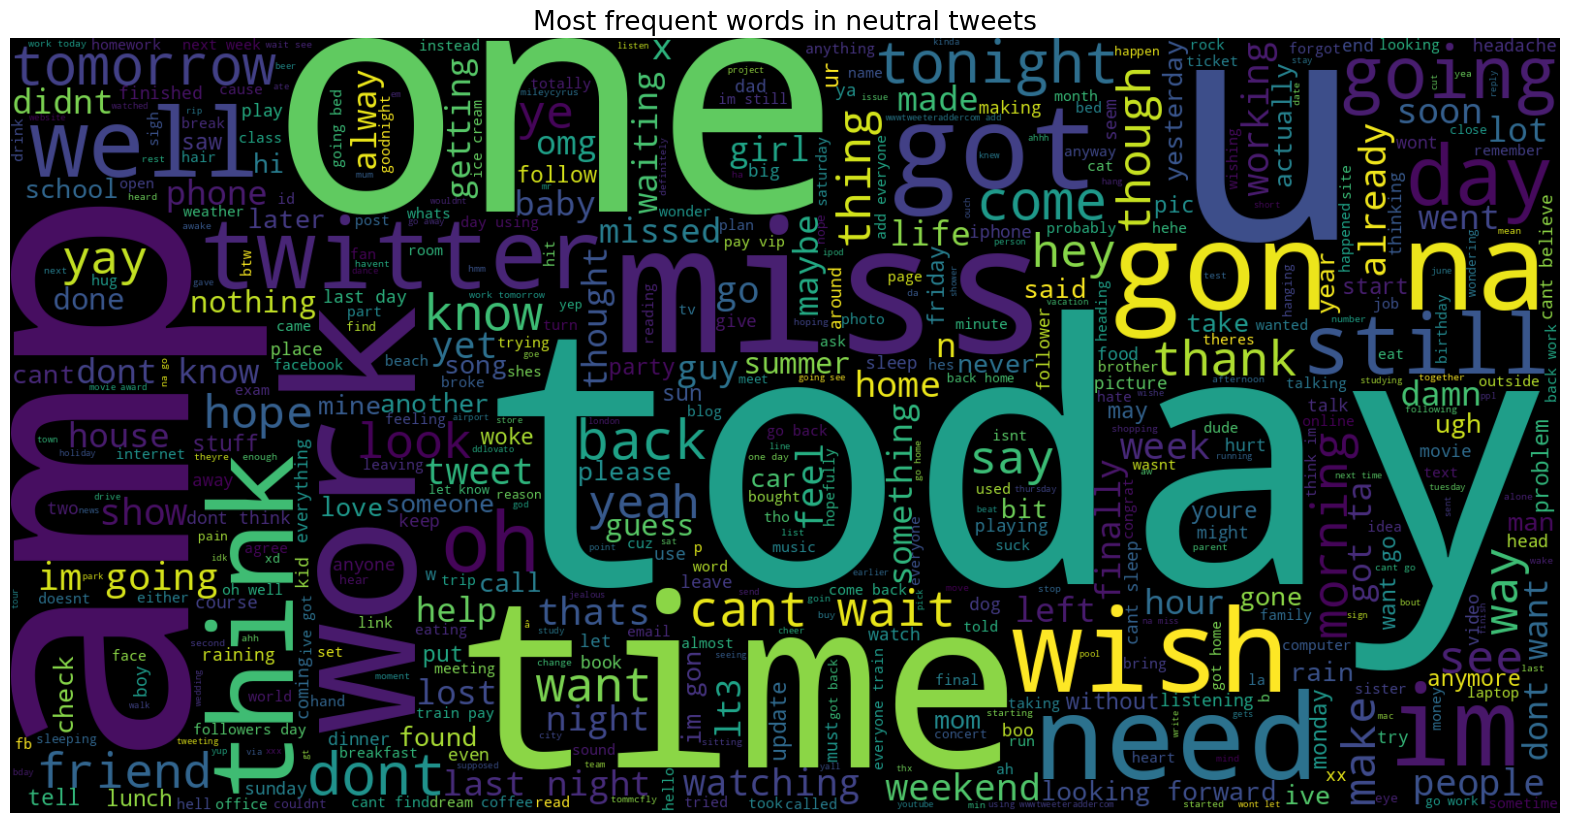

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [21]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [22]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [23]:
#split the data set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1280000, 5996416)
Size of y_train: (1280000,)
Size of x_test: (320000, 5996416)
Size of y_test: (320000,)


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.71%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 64625    418   1040]
 [   685 117239    691]
 [   922    357 134023]]


              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98     66083
     Neutral       0.99      0.99      0.99    118615
    Positive       0.99      0.99      0.99    135302

    accuracy                           0.99    320000
   macro avg       0.99      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000



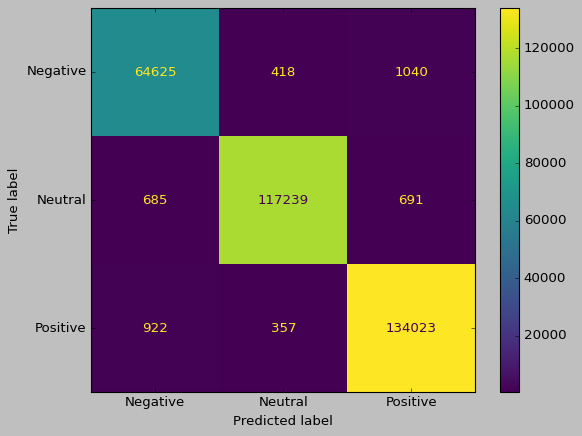

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.1, 1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, n_jobs=1)
grid.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.1, 1]})

In [28]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [29]:
y_pred = grid.predict(x_test)

In [30]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.70%


In [31]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 64607    423   1053]
 [   736 117209    670]
 [   940    346 134016]]


              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98     66083
     Neutral       0.99      0.99      0.99    118615
    Positive       0.99      0.99      0.99    135302

    accuracy                           0.99    320000
   macro avg       0.99      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000



In [32]:
from sklearn.svm import LinearSVC

In [33]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [34]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 98.69%


In [35]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 64881    217    985]
 [  1032 116744    839]
 [   910    215 134177]]


              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98     66083
     Neutral       1.00      0.98      0.99    118615
    Positive       0.99      0.99      0.99    135302

    accuracy                           0.99    320000
   macro avg       0.98      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000



In [36]:
grid = {
    'C': [0.1, 1],
    'kernel': ["linear", "rbf"],
    'degree': [3],
    'gamma': [0.01]
}
grid = GridSearchCV(SVCmodel, param_grid, cv=3, n_jobs=1)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=1, param_grid={'C': [0.1, 1]})

In [37]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [38]:
y_pred = grid.predict(x_test)

In [39]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.69%


In [40]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 64881    217    985]
 [  1032 116744    839]
 [   910    215 134177]]


              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98     66083
     Neutral       1.00      0.98      0.99    118615
    Positive       0.99      0.99      0.99    135302

    accuracy                           0.99    320000
   macro avg       0.98      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000

